In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
file = "D:\codes_python\sds project\games_cleaned_withoutOutliers.csv"
games = pd.read_csv(file)

In [2]:
games.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [3]:
games

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_time
0,fyfWyjj2,1.0,56.0,resign,black,10+6,mindworm,2180.0,lolmens,2134.0,"['d4', 'Nf6', 'c4', 'c6', 'd5', 'e6', 'Nc3', '...",A50,Slav Indian,4.0,152.045167
1,QmCyfnNZ,1.0,55.0,resign,white,10+0,philipp_0x,1291.0,alywezza,1326.0,"['Nf3', 'c5', 'd4', 'cxd4', 'Nxd4', 'd5', 'g3'...",A04,Zukertort Opening: Sicilian Invitation,2.0,137.408000
2,X1hUH5gY,1.0,2.0,resign,white,180+180,chiggen,1291.0,drakon1,965.0,"['e4', 'd5']",B01,Scandinavian Defense,2.0,0.929667
3,xfD25ZBl,1.0,111.0,resign,white,9+5,khelil,1611.0,gleb763,1418.0,"['e4', 'e5', 'Bc4', 'c6', 'Qh5', 'd5', 'exd5',...",C23,Bishop's Opening: Philidor Counterattack,4.0,169.290000
4,BFo44qd4,1.0,25.0,mate,white,10+0,elvis1997,2168.0,kabuto87,1650.0,"['e4', 'Nc6', 'd4', 'd5', 'e5', 'Qd7', 'Be2', ...",B00,Nimzowitsch Defense: Scandinavian Variation | ...,5.0,49.667500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8002,SVScVlox,1.0,53.0,mate,white,30+0,hamed5058,1709.0,jat,1442.0,"['e4', 'd5', 'exd5', 'c6', 'd4', 'cxd5', 'Nc3'...",B13,Caro-Kann Defense: Exchange Variation,5.0,158.018833
8003,eBZNlH7w,1.0,55.0,resign,black,20+0,sdmabunda,1518.0,rehcsif6rehcsif,1546.0,"['e4', 'e5', 'Nf3', 'Nc6', 'Bb5', 'a6', 'Bxc6'...",C68,Ruy Lopez: Exchange Variation,7.0,181.858500
8004,MtDU2OuN,1.0,30.0,mate,black,20+5,aradov,1060.0,rodrigowski19,1202.0,"['e4', 'c5', 'd4', 'cxd4', 'Qxd4', 'Nc6', 'Qe3...",B21,Sicilian Defense: Smith-Morra Gambit #2,3.0,32.038167
8005,wL5yxYVK,1.0,61.0,resign,white,15+15,azomio,1410.0,karanlikyol,1355.0,"['f4', 'f6', 'e3', 'e5', 'fxe5', 'fxe5', 'Qh5+...",A02,Bird Opening,1.0,157.164167


In [4]:
games.describe()

,rated,turns,white_rating,black_rating,opening_ply,game_time
count,8007.000000,8007.000000,8007.000000,8007.000000,8007.000000,8007.000000
mean,0.823405,57.523917,1592.976722,1586.674155,4.483952,110.905513
std,0.381350,29.916328,270.051398,271.501713,2.239631,68.437584
min,0.000000,1.000000,856.000000,854.000000,1.000000,0.320333
25%,1.000000,36.000000,1406.000000,1403.000000,3.000000,58.759250
50%,1.000000,54.000000,1572.000000,1565.000000,4.000000,101.333833
75%,1.000000,75.000000,1780.000000,1771.000000,6.000000,152.193917
max,1.000000,143.000000,2376.000000,2368.000000,10.000000,327.200833


In [5]:
mu = games["turns"].mean()
sigma = games["turns"].std()
games["turns"] = (games["turns"] - mu)/sigma

In [6]:
games["turns"]

0      -0.050939
1      -0.084366
2      -1.855974
3       1.787522
4      -1.087163
          ...   
8002   -0.151219
8003   -0.084366
8004   -0.920030
8005    0.116194
8006   -0.552338
Name: turns, Length: 8007, dtype: float64

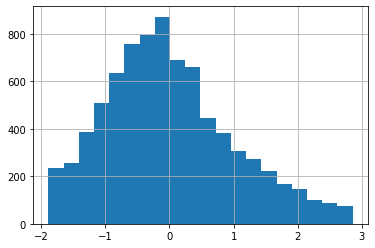

In [7]:
games["turns"].hist(bins = 20)

In [8]:
mu = games["white_rating"].mean()
sigma = games["white_rating"].std()
games["white_rating"] = (games["white_rating"] - mu)/sigma

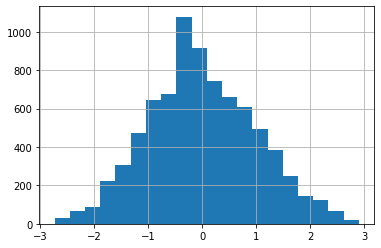

In [9]:
games["white_rating"].hist(bins = 20)

In [10]:
mu = games["black_rating"].mean()
sigma = games["black_rating"].std()
games["black_rating"] = (games["black_rating"] - mu)/sigma

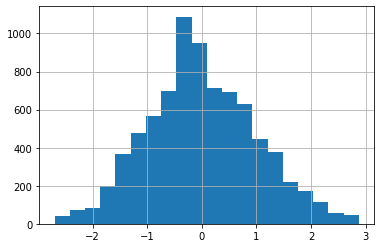

In [11]:
games["black_rating"].hist(bins = 20)

In [12]:
mu = games["game_time"].mean()
sigma = games["game_time"].std()
games["game_time"] = (games["game_time"] - mu)/sigma

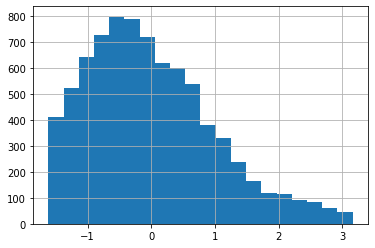

In [18]:
games["game_time"].hist(bins = 20)

In [20]:
games.describe()

,rated,turns,white_rating,black_rating,opening_ply,game_time
count,8007.000000,8.007000e+03,8.007000e+03,8.007000e+03,8007.000000,8.007000e+03
mean,0.823405,-7.416739e-17,-3.595531e-15,2.375138e-15,4.483952,1.902344e-15
std,0.381350,1.000000e+00,1.000000e+00,1.000000e+00,2.239631,1.000000e+00
min,0.000000,-1.889400e+00,-2.729024e+00,-2.698599e+00,1.000000,-1.615855e+00
25%,1.000000,-7.194705e-01,-6.923746e-01,-6.765120e-01,3.000000,-7.619536e-01
50%,1.000000,-1.177924e-01,-7.767678e-02,-7.983064e-02,4.000000,-1.398600e-01
75%,1.000000,5.841654e-01,6.925470e-01,6.789123e-01,6.000000,6.033001e-01
max,1.000000,2.857172e+00,2.899534e+00,2.877793e+00,10.000000,3.160476e+00


{'whiskers': [<matplotlib.lines.Line2D at 0x197d426be48>,
 'caps': [<matplotlib.lines.Line2D at 0x197d4271ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x197d426bcc8>],
 'medians': [<matplotlib.lines.Line2D at 0x197d4274e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x197d4277cc8>],
 'means': []}

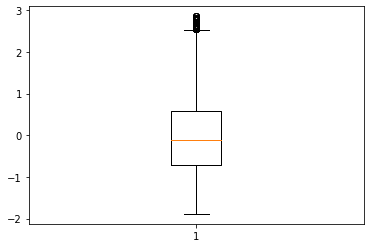

In [21]:
plt.boxplot(games["turns"])

{'whiskers': [<matplotlib.lines.Line2D at 0x197d42d8f48>,
 'caps': [<matplotlib.lines.Line2D at 0x197d42ddf08>,
 'boxes': [<matplotlib.lines.Line2D at 0x197d42d8488>],
 'medians': [<matplotlib.lines.Line2D at 0x197d42e1e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x197d42e1f88>],
 'means': []}

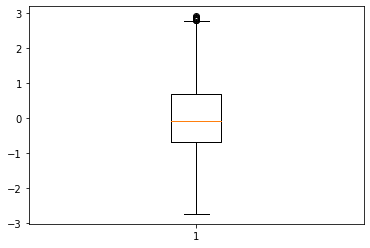

In [22]:
plt.boxplot(games["white_rating"])

{'whiskers': [<matplotlib.lines.Line2D at 0x197d433ff48>,
 'caps': [<matplotlib.lines.Line2D at 0x197d4342c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x197d433f688>],
 'medians': [<matplotlib.lines.Line2D at 0x197d4346d08>],
 'fliers': [<matplotlib.lines.Line2D at 0x197d434bd08>],
 'means': []}

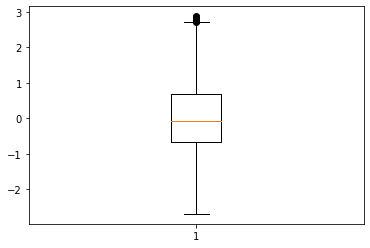

In [23]:
plt.boxplot(games["black_rating"])

{'whiskers': [<matplotlib.lines.Line2D at 0x197d43a7a48>,
 'caps': [<matplotlib.lines.Line2D at 0x197d43aca08>,
 'boxes': [<matplotlib.lines.Line2D at 0x197d43a2f88>],
 'medians': [<matplotlib.lines.Line2D at 0x197d43b0988>],
 'fliers': [<matplotlib.lines.Line2D at 0x197d43b0fc8>],
 'means': []}

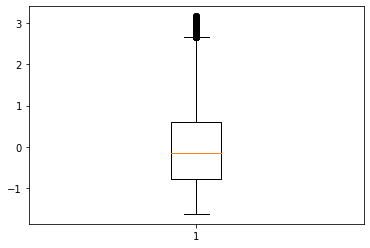

In [24]:
plt.boxplot(games["game_time"])

In [25]:
games.to_csv("games_normalized.csv")